<a href="https://colab.research.google.com/github/htapiagroup/sistemas-distribuidos-evaluacion-intersemestral-cflores23/blob/master/Examen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primer examen Parcial

Alumno: Camilo Flores Rodríguez

Trabajé solo

# Adquirir los datos.
1. El conjunto de datos con el que van a trabajar esta disponibles en este enlace y consiste en 12 archivos de texto que tiene informacion del viajes de taxis en la ciudad de NY durante el 2013.

   - En la red interna de LANIA usando cable la descarga del archivo comprimido desde el enlace tomó entre 5 y 10 minutos. Tomen sus provisiones
   - El archivo comprimido tiene un tamaño de aproximadamente 4G, el tamaño de archivo mensual oscila entre 2.0 y 2.5G. La base de datos completa es de aproximadamente 30G.

2. Una vez descargado el archivo pueden descomprimirlo usando la siguiente instruccion
   - !7z x trip_data.7z -o/content/ sin embargo si intentan descomprimir todos los archivos en su sesion se van a terminar el espacio de disco disponible. En esta practica solo van a trabajar con datos correspondientes a los primeros cuatro meses.

Inicié trabajando en Google Drive, sin embargo, muy pronto se terminó el espacioe en el disco. 
Por lo tanto, he decidido trabajar de manera local.
La descarga y descomprensión de los datos lo hice localmente. Verifiquemos que los datos se encuentren localmente.

In [1]:
ls

=0.0.1a3             JaspersoftWorkspace/ Untitled1.ipynb
Applications/        Library/             Untitled2.ipynb
CmapToolsLogs/       Movies/              Untitled3.ipynb
Desktop/             Music/               Zotero/
Documents/           Pictures/            ciudadesvue/
Downloads/           Public/              test-project/
Frigometro2.pdf      Untitled.ipynb       test-project2/


In [2]:
cd Desktop

/Users/MacBookPro15/Desktop


In [4]:
cd SistDist2_Examen1

/Users/MacBookPro15/Desktop/SistDist2_Examen1


In [5]:
ls

Sist_Dist2_Examen1(1).ipynb  trip_data/
Untitled.ipynb               trip_data.7z


In [6]:
cd trip_data

/Users/MacBookPro15/Desktop/SistDist2_Examen1/trip_data


In [7]:
ls

trip_data_1.csv*  trip_data_12.csv* trip_data_4.csv*  trip_data_7.csv*
trip_data_10.csv* trip_data_2.csv*  trip_data_5.csv*  trip_data_8.csv*
trip_data_11.csv* trip_data_3.csv*  trip_data_6.csv*  trip_data_9.csv*


Observamos que los archivos se encuentran en una carpeta local llamada trip_data. Procedamos a responder las preguntas.


3. Responder las siguientes preguntas:
     -  Cuantas columnas contiene cada archivo de datos descomprimido
     -  Cuantos renglones tiene cada archivo

In [0]:
import pandas as pd, time

REalizaré una prueba para ver si se leen los archivos correctamente y de paso familiarizarme con los datos. Para ello imprimiré los encabezados de un archivo

In [0]:
df = pd.read_csv('trip_data_1.csv')

In [10]:
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


In [0]:
import dask.dataframe as da, time

En la siguiente celda se puede apreciar la respusta a las dos preguntas:

In [14]:
plantilla = "trip_data_{}.csv"
for x in range(1, 12):
  df_temp = da.read_csv(plantilla.format(x), dtype={' store_and_fwd_flag': 'object'})
  print(df_temp.compute().shape)

(14776615, 14)


/anaconda3/lib/python3.7/site-packages/dask/core.py:118: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]


(13990176, 14)
(15749228, 14)
(15100468, 14)
(15285049, 14)
(14385456, 14)
(13823840, 14)
(12597109, 14)
(14107693, 14)
(15004556, 14)
(14388451, 14)


4. Identificar si existen renglones con errores en los datos, por ejemplo si hay columnas de mas (o de menos), si hay campos vacios, etc. Si se detectan renglones con errores:
    - indicar claramente cuantos son los renglones con errores y a que archivos corresponden
    - crear un nuevo conjunto de datos con los errores eliminados
    
    Como se puede apreciar, los archivos si contienen erorres. Se lista cada archivo con sus correspondientes nombres de columna y el numero de errores que contienen. Cada archivo se separa por barras para indentificar claramente cada uno. 

In [31]:
nombres_cols = df.columns.tolist()
print('{}'.format("El archivo 1 tiene:"))
for column in nombres_cols:
  print("Valores nulos en la columna <{0}>: {1}".format(column, df[column].isnull().sum()))

El archivo 1 tiene:
Valores nulos en la columna <medallion>: 0
Valores nulos en la columna <hack_license>: 0
Valores nulos en la columna <vendor_id>: 0
Valores nulos en la columna <rate_code>: 0
Valores nulos en la columna <store_and_fwd_flag>: 7326207
Valores nulos en la columna <pickup_datetime>: 0
Valores nulos en la columna <dropoff_datetime>: 0
Valores nulos en la columna <passenger_count>: 0
Valores nulos en la columna <trip_time_in_secs>: 0
Valores nulos en la columna <trip_distance>: 0
Valores nulos en la columna <pickup_longitude>: 0
Valores nulos en la columna <pickup_latitude>: 0
Valores nulos en la columna <dropoff_longitude>: 86
Valores nulos en la columna <dropoff_latitude>: 86


In [33]:
df = pd.read_csv('trip_data_2.csv')
print('{}'.format("El archivo 2 tiene:"))
for column in nombres_cols:
  print("Valores nulos en la columna <{0}>: {1}".format(column, df[column].isnull().sum()))

El archivo 2 tiene:
Valores nulos en la columna <medallion>: 0
Valores nulos en la columna <hack_license>: 0
Valores nulos en la columna <vendor_id>: 0
Valores nulos en la columna <rate_code>: 0
Valores nulos en la columna <store_and_fwd_flag>: 6952551
Valores nulos en la columna <pickup_datetime>: 0
Valores nulos en la columna <dropoff_datetime>: 0
Valores nulos en la columna <passenger_count>: 0
Valores nulos en la columna <trip_time_in_secs>: 0
Valores nulos en la columna <trip_distance>: 0
Valores nulos en la columna <pickup_longitude>: 0
Valores nulos en la columna <pickup_latitude>: 0
Valores nulos en la columna <dropoff_longitude>: 113
Valores nulos en la columna <dropoff_latitude>: 113


In [0]:
df = pd.read_csv('trip_data_3.csv')
print('{}'.format("El archivo 3 tiene:"))
for column in nombres_cols:
  print("Valores nulos en la columna <{0}>: {1}".format(column, df[column].isnull().sum()))

In [0]:

for x in range(3, 12):
  df = da.read_csv(plantilla.format(x))
  print('{}{}{}'.format("El archivo trip_data_",x," tiene:"))
  for column in nombres_cols:
    print("Valores nulos en la columna <{0}>: {1}".format(column, df[column].isnull().sum()))
  print("\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\")

In [0]:
plantilla = "trip_data_{}.csv"
plantillaOut = "Newtrip_data_{}.csv"
missing_values = ["", " ", "-", "_"]

for x in range(3, 12):
  df_temp = pd.read_csv(plantilla.format(x), na_values = missing_values)
  datosConErrores = df_temp.isna()
  errores = datosConErrores[datosConErrores.isin([True])].dropna(how="all")
  print("El archivo {} tiene {} filas con valores nulos".format(x, errores.shape[0]))


El archivo 3 tiene 7819244 filas con valores nulos
El archivo 4 tiene 7518657 filas con valores nulos
El archivo 5 tiene 7621856 filas con valores nulos
El archivo 6 tiene 7222712 filas con valores nulos
El archivo 7 tiene 6990760 filas con valores nulos
El archivo 8 tiene 6066630 filas con valores nulos
El archivo 9 tiene 7159367 filas con valores nulos
El archivo 10 tiene 7529626 filas con valores nulos
El archivo 11 tiene 7252607 filas con valores nulos


 2. crear un nuevo conjunto de datos con los errores eliminados

In [0]:
for x in range(1, 13):
  df = da.read_csv(plantilla.format(x))
  df_sinNulos = df.dropna(how='any')

Como podemos observar en el resultado anterior, hemos creado un nuevo conjunto llamado df_sinNulos sin los errores

Ahora verifiquemos un archivo cualquiera para ver si aún tiene valores con errores

In [0]:
df = pd.read_csv('trip_data_2.csv')
print('{}'.format("El archivo 2 tiene:"))
for column in nombres_cols:
  print("Valores nulos en la columna <{0}>: {1}".format(column, df[column].isnull().sum()))

5. Crear un DataFrame usando la libreria pandas y responder lo siguiente:
    - Indicar el tiempo en segundos, que tarda la libreria pandas en leer un archivo a un DataFrame
    - Cual es la huella de memoria del proceso usado para generar el objeto DataFrame
        - Para responder esta pregunta tomaré los resultados que obtuve cuando trabajé en Google drive, debido a que como se puede apreciar en las celdas posteriores los resultados no son muy coherentes cuando trabajé localmente:
            - Memoria antes: 143.6328125 MB
            - Memoria despues: 5107.66796875 MB
            
    - Cuanta memoria del sistema se usa para crear el objeto anterio
    r
            - La cantidad de memoria que ocupa el dataframe es de: 4964.03515625 MB
            
            Los resultados los obtuve con las mismas instrucciones que tengo en el presente documento
    - Indicar el tiempo que tarda pandas en obtener el promedio de la distancia de viaje (trip_distance)

In [43]:
t_inicio = time.time()
df = pd.read_csv('trip_data_1.csv')
t_fin = time.time()
print('Tiempo de lectura: {} s'.format(t_fin-t_inicio))  # time [s]

Tiempo de lectura: 162.51599884033203 s


In [0]:
import psutil, os

def huella_memoria():
  '''Regresa la huella de memoria usada por un proceso de Python'''
  mem = psutil.Process(os.getpid()).memory_info().rss
  return (mem / 1024**2)

In [0]:
antes = huella_memoria()

In [0]:
n = (1024**2)//8

In [0]:
df = pd.read_csv('trip_data_1.csv')

In [0]:
despues = huella_memoria()

In [65]:
print('Memoria antes: {} MB'.format(antes))

Memoria antes: 852.03515625 MB


In [66]:
print('Memoria despues: {} MB'.format(despues))

Memoria despues: 989.328125 MB


Para responder la pregunta 3 hacemos una resta para saber la diferencia entre la memoria anterior y la actual, así sabremos cuanta memoria ocupa el objeto.

In [67]:
mem_objeto = despues-antes

print('La cantidad de memoria que ocupa el dataframe es de: {} MB'.format(mem_objeto))

La cantidad de memoria que ocupa el dataframe es de: 137.29296875 MB


In [70]:
inicio = time.time()
promedio=df['trip_distance'].mean()
fin = time.time()

print('{}{}'.format("El tiempo que tarda en calcular el promedio es:",fin-inicio))

El tiempo que tarda en calcular el promedio es:0.046011924743652344


6. Todos los pasos siguientes deben realizarse usando la libreria dask
    - Indicar el tiempo que tarda en obtener el promedio de la distancia de viaje (trip_distance)
    - Indicar el tiempo que tarda en obtener el promedio de la duracion de viaje (trip_time_in_secs)
    
   - Con las columnas pickup_datetime y dropoff_datetime como objetos temporales, crear una nueva columna en los dataframes que se llame duracion y compararla renglon a renglon con la columna trip_time_in_secs
   
   - Definir un viaje_largo como aquellos en los que la duracion del viaje (trip_time_in_secs) sea mayor a 20 minutos.

In [0]:
import dask.dataframe as da, time

In [0]:
archivos = da.read_csv("*.csv")

In [90]:

prom = archivos["trip_distance"].mean()
inicio = time.time()
promedio = prom.compute()
fin = time.time()
print("El tiempo que tarda en obtener el promedio de la distancia de viaje: {} seg".format(fin - inicio))

El tiempo que tarda en obtener el promedio de la distancia de viaje: 637.650043964386 seg


In [91]:
# Convert 'pickup_datetime' column to datetime objects
archivos["pickup_datetime"] = da.to_datetime( archivos["pickup_datetime"] )
# Convert 'dropoff_datetime' column to datetime objects
archivos["dropoff_datetime"] = da.to_datetime( archivos["dropoff_datetime"] )
# Make column 'duracion'
archivos["duracion"] = archivos["dropoff_datetime"] - archivos["pickup_datetime"]
# Construct column 'duracion'
archivos["duracion"] = archivos["duracion"].dt.total_seconds()
out = archivos[(archivos["duracion"] != archivos["trip_time_in_secs"] )]
print("Hay {} datos diferentes".format(archivos.compute().shape[0] - out.compute().shape[0]))

Hay 29525282 datos diferentes


7. Contar el número de viajes largos que hay en cada archivo

In [0]:
from dask import delayed

In [114]:
plantilla = 'Newtrip_data_{:d}.csv'

archivos = [plantilla.format(k) for k in range(1,13)] # comprension de lista
archivos

['Newtrip_data_1.csv',
 'Newtrip_data_2.csv',
 'Newtrip_data_3.csv',
 'Newtrip_data_4.csv',
 'Newtrip_data_5.csv',
 'Newtrip_data_6.csv',
 'Newtrip_data_7.csv',
 'Newtrip_data_8.csv',
 'Newtrip_data_9.csv',
 'Newtrip_data_10.csv',
 'Newtrip_data_11.csv',
 'Newtrip_data_12.csv']

In [0]:
@delayed
def cuenta_viajes_largos(df):
  da['duracion'] = (da.dropoff_datetime - da.pickup_datetime).dt.seconds
  es_viaje_largo = da.duracion > 1200 # viajes que duran mas de 20 minutos
  result_dict = {'n_long':[sum(es_viaje_largo)],
                'n_total':[len(da)]}
  return pd.DataFrame(result_dict)


@delayed
def abre_archivo(nombre):
  return pd.read_csv(nombre, parse_dates=[1,2])

totales = [cuenta_viajes_largos(abre_archivo(archivo)) for archivo in archivos]

totales_semi = sum(totales)

totales_semi = totales_semi.compute()

for i in range(1, 13):
  print('{}{}{}{}'.format("Hay ",totales_semi, "largos en el archivo ", i))

Hay 1175222viajes largos en el archivo 1
Hay 1175222viajes largos en el archivo 2
Hay 1175222viajes largos en el archivo 3
Hay 1175222viajes largos en el archivo 4
Hay 1175222viajes largos en el archivo 5
Hay 1175222viajes largos en el archivo 6
Hay 1175222viajes largos en el archivo 7
Hay 1175222viajes largos en el archivo 8
Hay 1175222viajes largos en el archivo 9
Hay 1175222viajes largos en el archivo 10
Hay 1175222viajes largos en el archivo 11
Hay 1175222viajes largos en el archivo 12


8. De los viajes largos, identificar el numero de taxis diferentes (la columna medallion contiene un numeroque identificada a cada uno de los vehiculos). Que vehiculos son los que mas viajes realizan en cada mes? Son el mismo vehiculo?

In [145]:

for i in range(1,13):
  archivos = da.read_csv(plantilla.format(x), usecols=["pickup_datetime", "dropoff_datetime","medallion"])
  archivos["pickup_datetime"] = da.to_datetime( archivos["pickup_datetime"] )   # convierto la columna a objetos de tiempo
  archivos["dropoff_datetime"] = da.to_datetime( archivos["dropoff_datetime"] )
  archivos["duracion"] = archivos["dropoff_datetime"] - archivos["pickup_datetime"]
  archivos["duracion"] = archivos["duracion"].dt.total_seconds()
  es_viaje_largo = archivos[(archivos["duracion"] > 1200)]   # viajes que duran mas de 20 minutos
  #Obtengo los taxis que hicieron esos viajes largos
  numero = es_viaje_largo['medallion'].value_counts().value_counts()
  # Construct column 'veces'
  print('{}{}{}'.format(es_viaje_largo['medallion']," tiene ",numero.compute()))

Dask Series Structure:
npartitions=20
    object
       ...
     ...  
       ...
       ...
Name: medallion, dtype: object
Dask Name: getitem, 400 tasks tiene 196    94
201    91
194    88
204    87
206    86
199    85
191    84
180    83
211    80
200    80
205    79
195    77
198    77
217    76
213    76
214    75
186    75
197    71
183    71
181    70
187    69
210    69
193    69
178    69
222    67
219    67
221    66
202    65
172    65
212    65
       ..
26      1
9       1
10      1
13      1
14      1
20      1
17      1
8       1
46      1
306     1
296     1
280     1
281     1
283     1
284     1
286     1
273     1
288     1
289     1
271     1
41      1
301     1
267     1
313     1
54      1
302     1
47      1
277     1
304     1
323     1
Name: medallion, Length: 281, dtype: int64


KeyboardInterrupt: ignored

9. Hacer una grafica temporal del numero total de pasajeros agregados por dias de la semana y despues por horas del dia. Sugerencia: agregar por el correspondiente periodo temporal y graficar. Que pueden observar de las graficas?

In [0]:
import matplotlib.pyplot as plt

Crearé un dataframe utilizando solo las columnas necesarias para que el cálculo sea más rápido
Agruparé por días del año y graficaré

In [0]:
archivos = da.read_csv("*.csv",usecols=["pickup_datetime","passenger_count"])

Text(0, 0.5, 'Pasajeros por semana')

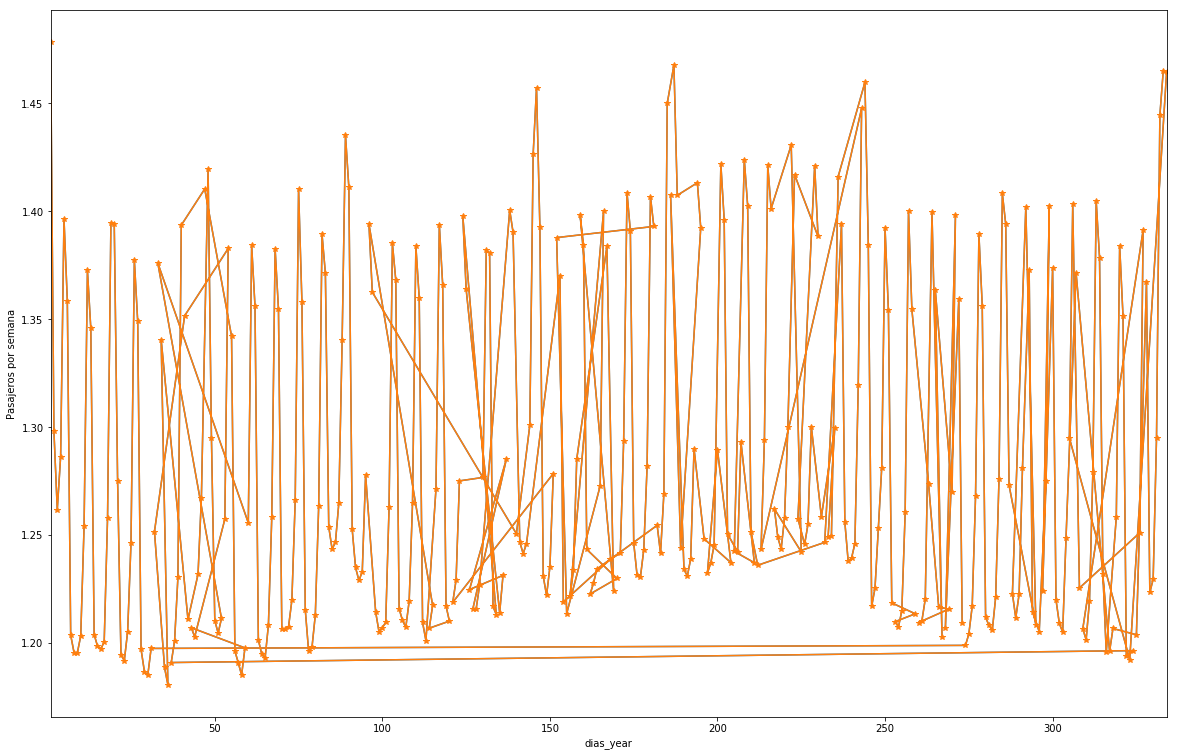

In [153]:
# convierto la columna a objetos de tiempo
archivos['subida_pasajero'] = da.to_datetime(archivos["pickup_datetime"])
#Convierto los datos en objetos días del año
archivos['dias_year'] = archivos["subida_pasajero"].dt.dayofyear
# Group by 'dias del año' column: hourly
dias_x_a = archivos.groupby('dias_year')
result = dias_x_a.passenger_count.mean()
tip_frac = result.compute()
tip_frac.plot.line()
tip_frac.plot.line(style="-*", figsize=(20,13))
plt.ylabel("Pasajeros por año")
plt.show()




En la gráfica se puede apreciar que los fines de semana aumenta el numero de pasajeros que suben a un taxi

Text(0, 0.5, 'Pasajeros por año')

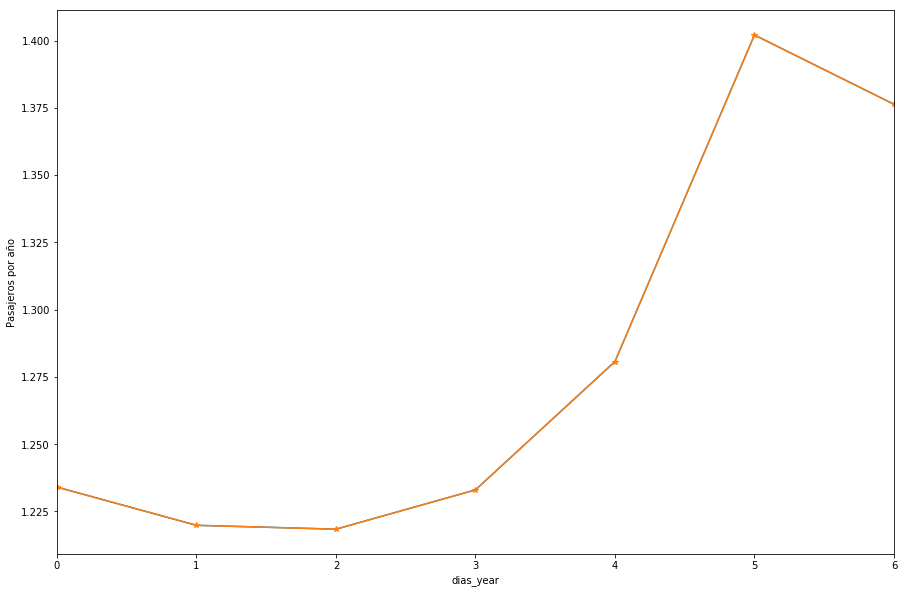

In [155]:
# convierto la columna a objetos de tiempo
archivos['subida_pasajero'] = da.to_datetime(archivos["pickup_datetime"])
#Convierto los datos en objetos días del año
archivos['dias_year'] = archivos["subida_pasajero"].dt.dayofweek
# Group by 'dias del año' column: hourly
dias_x_a = archivos.groupby('dias_year')
result = dias_x_a.passenger_count.mean()
tip_frac = result.compute()
tip_frac.plot.line()
tip_frac.plot.line(style="-*", figsize=(15,10))
plt.ylabel("Pasajeros por semana")
plt.show()